In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
bg_train = pd.read_csv('bigmart_train.csv')
bg_test = pd.read_csv('bigmart_test.csv')

In [3]:
bg_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
bg_train.isnull().sum()  #isna()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

C:\Users\gabab\Software\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


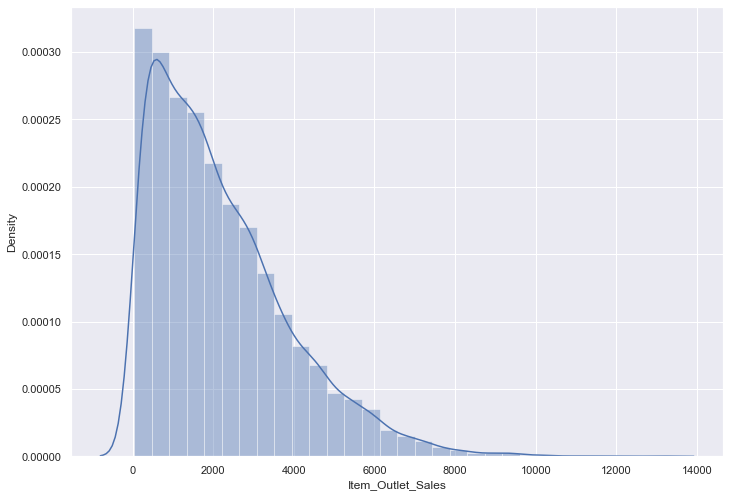

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bg_train['Item_Outlet_Sales'], bins=30)
plt.show()

<AxesSubplot:>

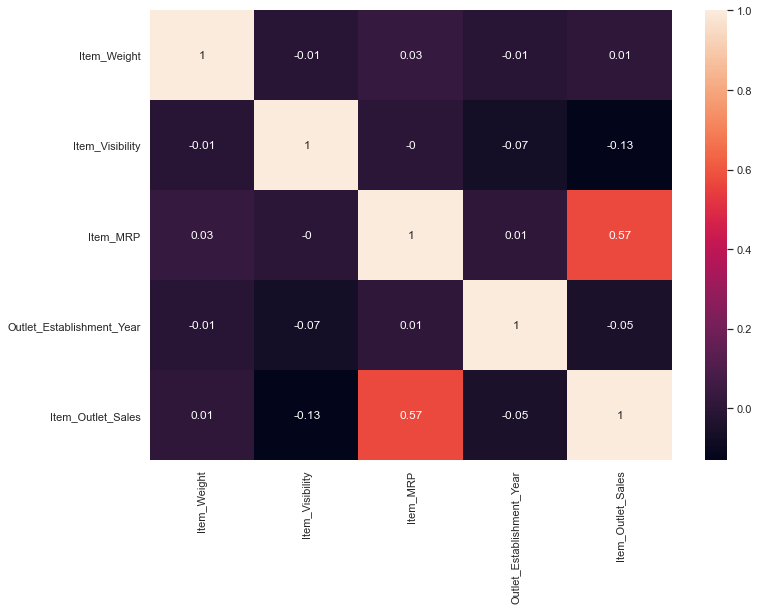

In [10]:
correlation_matrix = bg_train.corr().round(2)
#annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

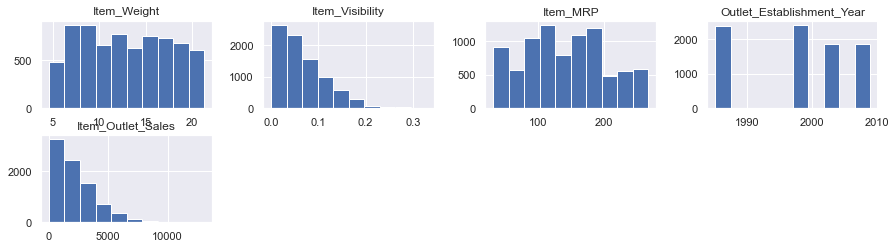

In [16]:
bg_train.hist(layout=(5,4), figsize=(15,10))
plt.show()

In [18]:
bg_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
bg_train['Outlet_Age'] = 2021 - bg_train['Outlet_Establishment_Year']
bg_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


In [21]:
print(bg_train['Outlet_Size'].mode()[0])
bg_train['Outlet_Size'] = bg_train['Outlet_Size'].fillna(bg_train['Outlet_Size'].mode()[0])

Medium


In [22]:
print(bg_train['Item_Weight'].mean())
bg_train['Item_Weight'] = bg_train['Item_Weight'].fillna(bg_train['Item_Weight'].mean())

12.857645184136183


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bg_train['Item_Fat_Content'] = le.fit_transform(bg_train['Item_Fat_Content'])
bg_train['Outlet_Size'] = le.fit_transform(bg_train['Outlet_Size'])
bg_train['Outlet_Location_Type'] = le.fit_transform(bg_train['Outlet_Location_Type'])